# Load data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [22]:
df_train = pd.read_csv('data/train.csv')
df_val = pd.read_csv('data/val.csv')
df_test = pd.read_csv('data/test.csv')
df = pd.concat([df_train, df_val], axis=0)
df

,price,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,type,street_in_front_of_house,width,district
0,23.90,80.0,6.0,6.0,1,1,1,1,Nhà mặt phố,8.0,5.000000,Long Biên
1,7.40,59.0,5.0,4.0,0,0,0,0,Nhà mặt phố,3.0,5.180581,Bắc Từ Liêm
2,8.40,45.0,4.0,4.0,0,0,0,0,Nhà trong hẻm,3.0,5.180581,Thanh Xuân
3,5.25,35.0,4.0,3.0,1,1,1,0,Nhà trong hẻm,2.5,3.300000,Hà Đông
4,26.00,55.0,9.0,7.0,1,1,1,1,Nhà trong hẻm,7.0,5.180581,Thanh Xuân
...,...,...,...,...,...,...,...,...,...,...,...,...
644,27.00,125.0,5.0,3.0,1,1,1,1,Nhà mặt phố,8.0,6.000000,Ngoại thành
645,31.00,75.0,8.0,10.0,1,1,1,1,Nhà trong hẻm,6.0,6.200000,Thanh Xuân
646,2.80,85.0,5.0,4.0,0,0,0,0,Nhà mặt phố,4.0,4.000000,Ngoại thành
647,12.00,54.0,4.0,6.0,0,0,0,0,Nhà trong hẻm,3.0,4.300000,Hai Bà Trưng


# Visualize bar chart with each feature

In [23]:
features = df.drop(columns=['price', 'area', 'street_in_front_of_house', 'width'])
total_features = features.columns.to_list()
total_features

['floor_number',
 'bedroom_number',
 'is_dinning_room',
 'is_kitchen',
 'is_terrace',
 'is_car_pack',
 'type',
 'district']

In [24]:
feature_unique_fields = {}
for i in total_features:
    feature_unique_fields[i] = features[i].unique().tolist()

len_features = len(feature_unique_fields)
for i in range(len_features):
    list(feature_unique_fields.values())[i].sort()
feature_unique_value = {}
for feature in total_features:
    # print("Feature: \n", feature)
    feature_len = len(feature_unique_fields[feature])
    # print("Len: ", feature_len)
    feature_value = feature_unique_fields[feature]
    # print(feature_value)
    feature_unique_value[feature] = [sum(df[df[feature] == feature_value[i]].price) / df[feature].value_counts()[feature_value[i]] for i in range(feature_len)]
    
# print(feature_unique_value)
feature_unique_fields


{'floor_number': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
 'bedroom_number': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
 'is_dinning_room': [0, 1],
 'is_kitchen': [0, 1],
 'is_terrace': [0, 1],
 'is_car_pack': [0, 1],
 'type': ['Căn hộ chung cư', 'Nhà mặt phố', 'Nhà trong hẻm'],
 'district': ['Ba Đình',
  'Bắc Từ Liêm',
  'Cầu Giấy',
  'Gia Lâm',
  'Hai Bà Trưng',
  'Hoàn Kiếm',
  'Hoàng Mai',
  'Hà Đông',
  'Long Biên',
  'Nam Từ Liêm',
  'Ngoại thành',
  'Thanh Xuân',
  'Tây Hồ',
  'Đông Anh',
  'Đống Đa']}

In [25]:
visualized_features = total_features
name_of_features = ['floor_number',
 'bedroom_number',
 'is_dinning_room',
 'is_kitchen',
 'is_terrace',
 'is_car_pack',
 'type',
 'direction',
 'city',
 'district']
labels = ['Số tầng', 'Số phòng ngủ', 'Có phòng ăn hay không', 'Có phòng bếp hay không', 'Có sân thượng hay không', 
'Có chỗ để xe hay không','Loại bất động sản','Thành phố', 'Quận/Huyện']
titles = ['Biểu đồ thể hiện giá nhà trung bình theo số tầng nhà','Biểu đồ giá nhà trung bình theo số phòng ngủ', 'Biểu đồ giá nhà trung bình theo phòng ăn', 
'Biểu đồ giá nhà trung bình có và không có bếp', 'Giá nhà trung bình với sân thượng', 'Giá nhà trung bình với chỗ để xe', 
'Biểu đồ thể hiện giá nhà trung bình theo loại bất động sản', 
'Biểu đồ thể hiện giá nhà trung bình theo thành phố', 'Biểu đồ thể hiện giá nhà trung bình theo quận/huyện bất động sản']

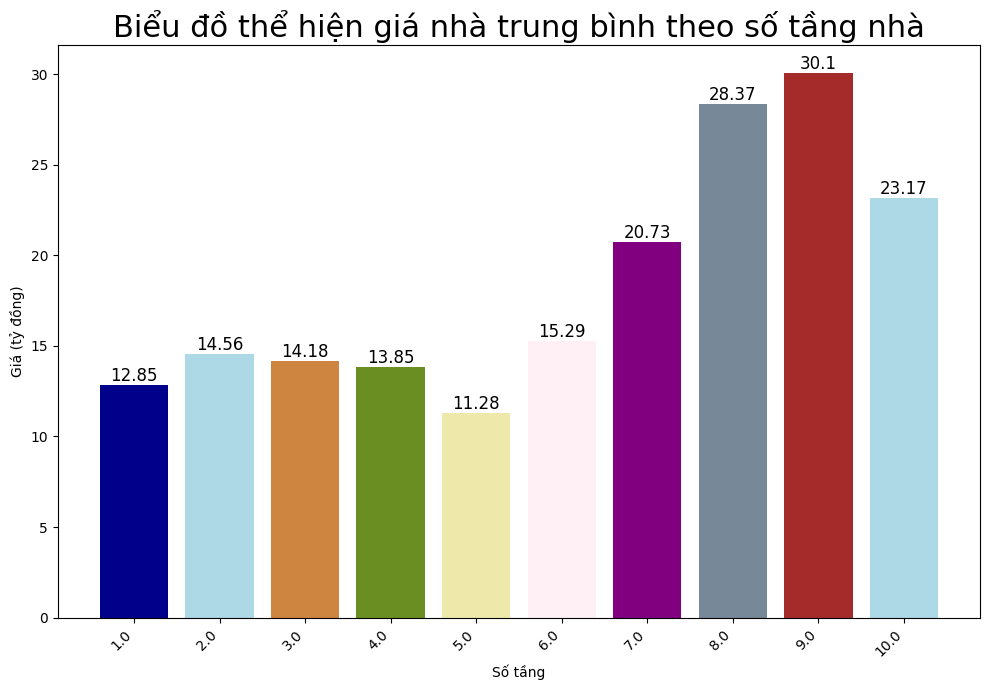

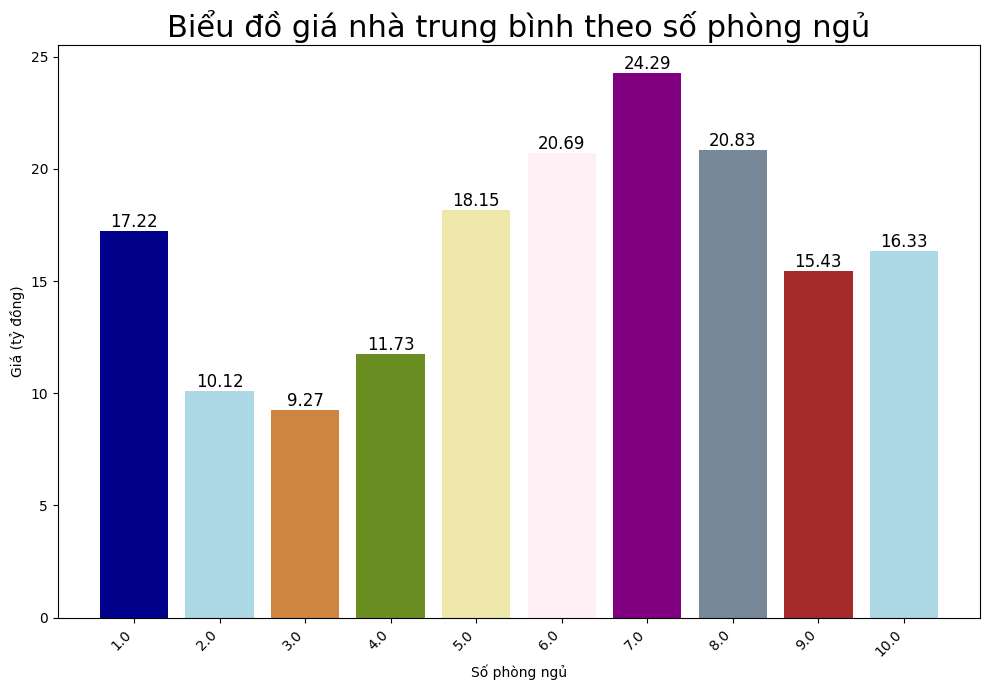

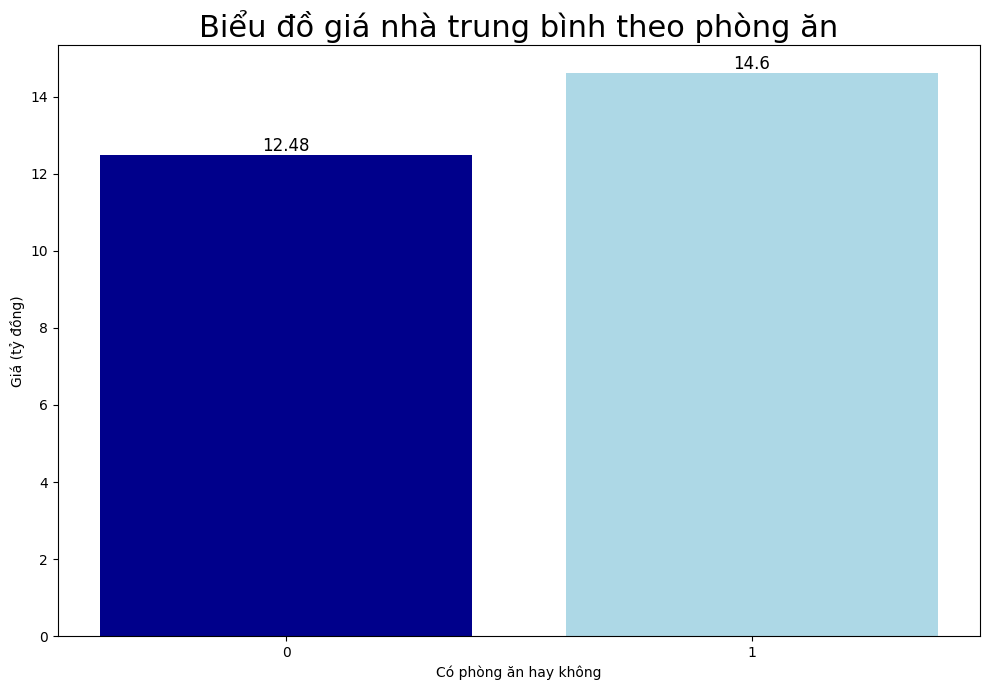

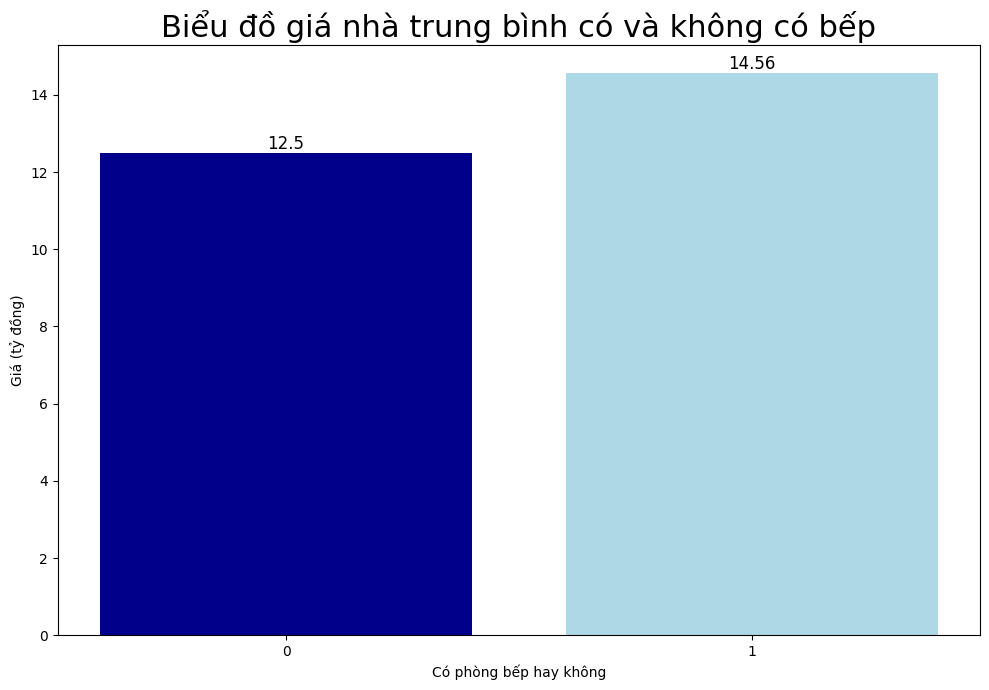

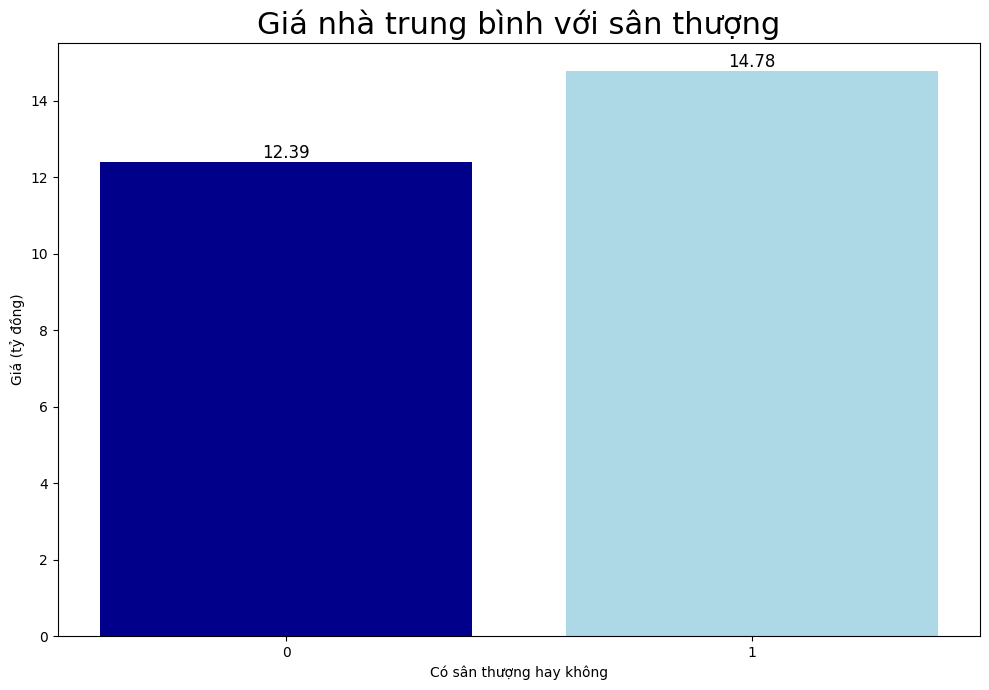

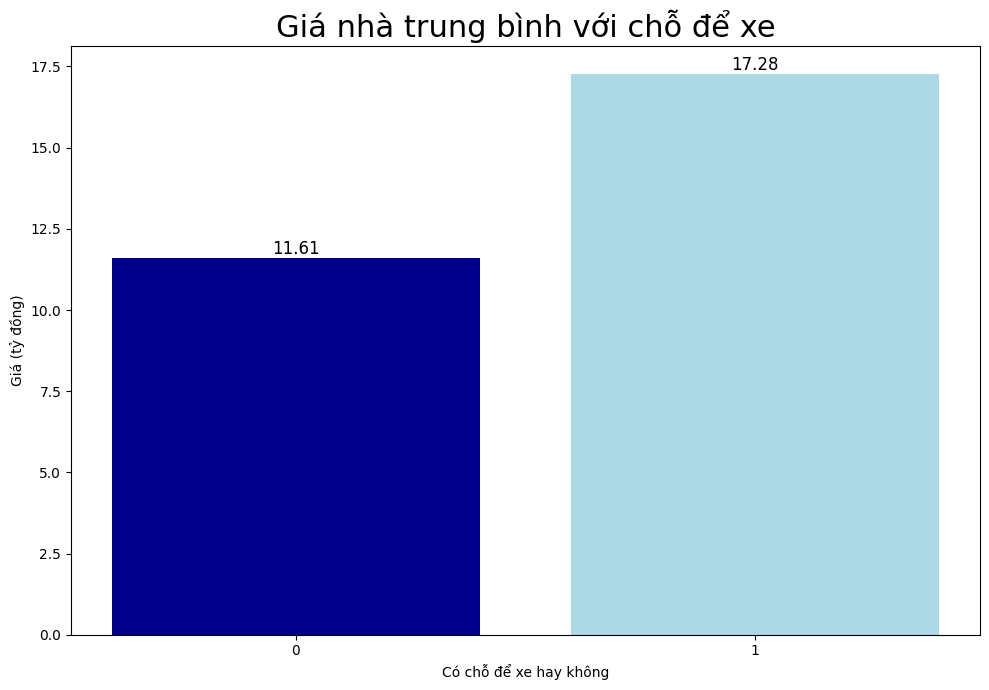

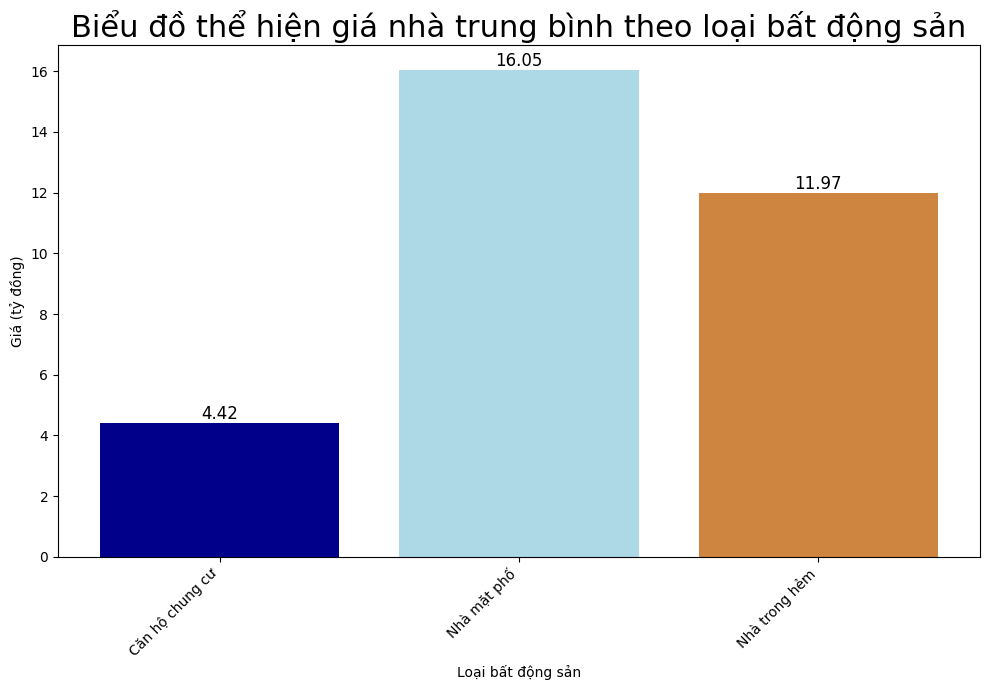

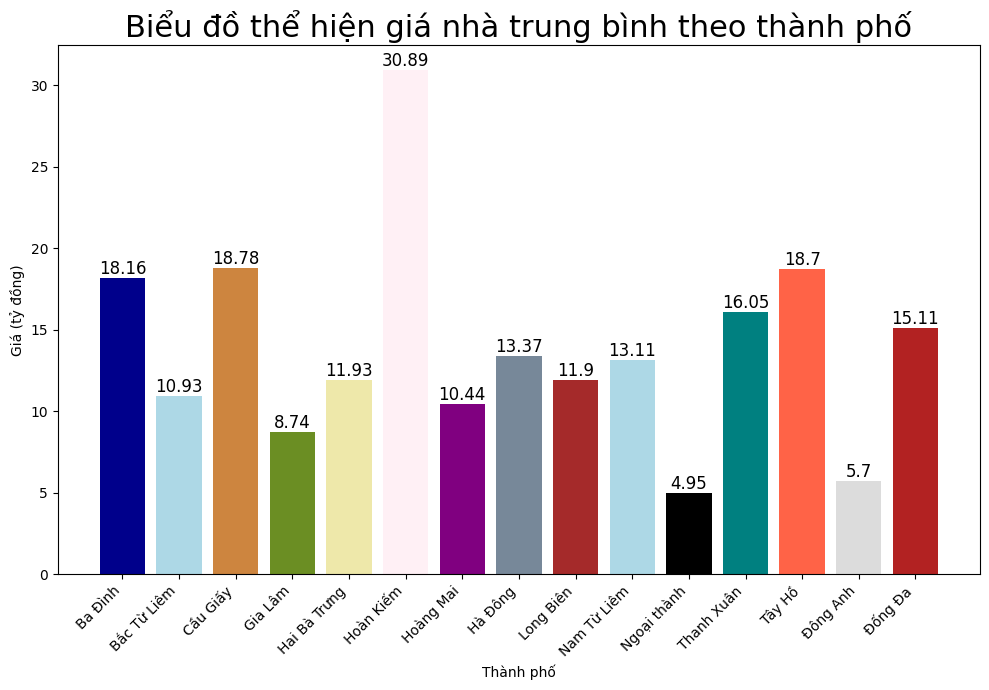

In [26]:
import random
count = 0
for feature in visualized_features:
    N = len(feature_unique_value[feature])
    ind = np.arange(N) 
    all_colors = list(plt.cm.colors.cnames.keys())
    random.seed(100)
    c = random.choices(all_colors, k=N) 
    text_value = {}
    for i in ind:
        text_value[i] = feature_unique_value[feature][i]
        
    fig = plt.subplots(figsize=(10, 7))
    plt.bar(ind, feature_unique_value[feature], color=c)
    
    for key in text_value:
        plt.text(key, text_value[key], float(round(text_value[key], 2)), 
                horizontalalignment='center', verticalalignment='bottom', 
                fontdict={'fontweight':500, 'size':12})
    
    # Decide whether to rotate labels based on number of categories and label length
    max_label_length = max([len(str(label)) for label in feature_unique_fields[feature]])
    available_width = 10  # Figure width in inches
    
    # Apply rotation if many values or long labels
    if N > 5 or (N * max_label_length > 30):
        plt.xticks(ind, list(feature_unique_fields[feature]), rotation=45, ha='right')
    else:
        plt.xticks(ind, list(feature_unique_fields[feature]))  # No rotation
    
    plt.xlabel(labels[count])
    plt.ylabel("Giá (tỷ đồng)")
    plt.title(titles[count], fontsize=22)
    plt.tight_layout()
    count += 1
    
plt.show()

# Preprocessing to be ready for predict 

In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [28]:
features_numerical = df.select_dtypes(exclude=['object', 'bool']).copy()
numerical_cols = features_numerical.columns.tolist()

numerical_cols.remove('price')
numerical_cols

['area',
 'floor_number',
 'bedroom_number',
 'is_dinning_room',
 'is_kitchen',
 'is_terrace',
 'is_car_pack',
 'street_in_front_of_house',
 'width']

In [29]:
features_categorical = df.select_dtypes(include=['object', 'bool']).copy()
categorical_cols = features_categorical.columns.tolist()
categorical_cols

['type', 'district']

In [30]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)     
    ],
    remainder='passthrough' 
)


In [31]:
y_train = df_train['price'].copy()
y_val = df_val['price'].copy()

df_train = df_train.drop(['price'], axis = 1)
df_val = df_val.drop(['price'], axis = 1)

In [32]:
y_train.to_numpy()
y_val.to_numpy()

array([ 3.2  ,  8.95 , 14.2  , 20.   , 34.5  , 28.5  ,  3.15 ,  4.   ,
        9.   , 22.   , 15.5  , 13.6  , 14.7  ,  6.2  ,  6.5  , 22.5  ,
       10.3  ,  7.5  , 14.2  , 12.5  , 19.2  , 10.   , 20.   , 19.   ,
       11.   ,  9.8  ,  6.3  ,  6.9  , 16.5  , 14.1  ,  7.3  , 12.   ,
        1.7  ,  9.9  ,  6.95 ,  7.2  ,  8.95 ,  7.5  ,  7.5  ,  1.65 ,
       23.5  ,  9.6  ,  4.75 ,  8.3  , 19.   , 13.6  ,  8.65 ,  5.85 ,
        6.95 , 15.5  ,  3.5  , 16.6  ,  8.6  ,  5.8  ,  1.15 , 38.   ,
        6.3  ,  6.5  , 16.8  ,  7.7  ,  6.4  , 45.   , 26.5  , 13.5  ,
        8.5  ,  5.8  , 40.   , 30.   ,  5.5  ,  8.9  ,  1.6  , 25.   ,
        5.8  ,  7.6  , 10.8  , 20.   ,  8.8  ,  6.85 , 34.   , 13.2  ,
        3.7  , 25.5  ,  8.   ,  3.35 , 11.5  , 12.7  , 28.   , 15.9  ,
        8.4  ,  2.25 ,  9.3  ,  5.6  , 48.   , 27.5  ,  5.4  , 21.6  ,
       10.8  , 41.   , 16.   ,  8.1  ,  6.9  ,  4.8  ,  7.5  , 17.   ,
        5.2  , 29.2  , 27.7  , 27.   , 18.6  , 10.   ,  6.3  , 19.5  ,
      

In [33]:
y_train.shape, y_val.shape

((1945,), (649,))

In [34]:
X_train = preprocessor.fit_transform(df_train)
X_val = preprocessor.transform(df_val)
X_test = preprocessor.transform(df_test)

In [35]:
from matplotlib import pyplot as plt

def plot_evaluate(y_true, y_pred):
    plt.plot(y_true, y_pred, 'b.')
    x = [np.min(y_true), np.max(y_true)]
    y = x
    plt.plot(x, y, 'r')
    plt.title('XGBoost')
    plt.xlabel('Reality')
    plt.ylabel('Predict')
    plt.show()

# Some form of KNN and Elbow method

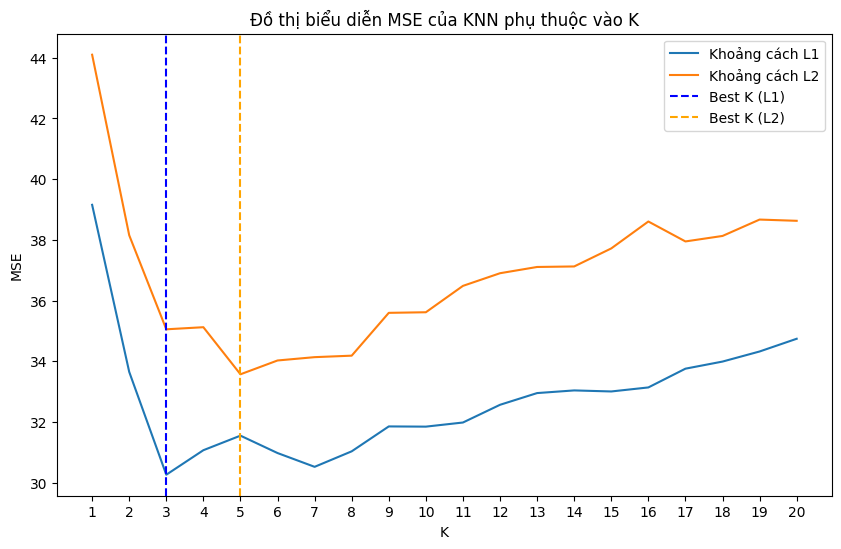

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# do elbow method for KNN
k_values = range(1, 21)

l1_errors = []
l2_errors = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k, p=1)
    knn_model.fit(X_train, y_train)
    l1_errors.append(mean_squared_error(y_val, knn_model.predict(X_val)))
    knn_model = KNeighborsRegressor(n_neighbors=k, p=2)
    knn_model.fit(X_train, y_train)
    l2_errors.append(mean_squared_error(y_val, knn_model.predict(X_val)))

plt.figure(figsize=(10, 6))
plt.plot(k_values, l1_errors, label='Khoảng cách L1')
plt.plot(k_values, l2_errors, label='Khoảng cách L2')
best_k_l1 = k_values[l1_errors.index(min(l1_errors))]
best_k_l2 = k_values[l2_errors.index(min(l2_errors))]
plt.axvline(x=best_k_l1, color='blue', linestyle='--', label='Best K (L1)')
plt.axvline(x=best_k_l2, color='orange', linestyle='--', label='Best K (L2)')
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('Đồ thị biểu diễn MSE của KNN phụ thuộc vào K')
plt.xticks(k_values)
plt.legend()
plt.show()

In [37]:
# select best k for l1 and l2 distances
k_best_l1 = k_values[np.argmin(l1_errors)]
k_best_l2 = k_values[np.argmin(l2_errors)]

knn_l1_model = KNeighborsRegressor(n_neighbors=k_best_l1, p=1)
knn_l1_model.fit(X_train, y_train)
y_test_pred = knn_l1_model.predict(X_test)
knn_l1_submit = pd.DataFrame({
  'Id': df_test.index,
  'TARGET': y_test_pred
})
knn_l1_submit.to_csv('results/knn_model_l1.csv', index=False)

knn_l2_model = KNeighborsRegressor(n_neighbors=k_best_l2, p=2)
knn_l2_model.fit(X_train, y_train)
y_test_pred = knn_l2_model.predict(X_test)
knn_l2_submit = pd.DataFrame({
  'Id': df_test.index,
  'TARGET': y_test_pred
})
knn_l2_submit.to_csv('results/knn_model_l2.csv', index=False)